# Introduction
### This dataset is a raw dataset, it contains information on Sales,State,Category,Postal Code,etc. It comprises of 9994 rows and 13 columns representing various aspect of the data.  To carryout data analysis i will be importing a library to aid me in my work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The name of the file i will be working with is "SampleSuperStore.csv". This is to load dataset.

In [3]:
df=pd.read_csv(r"C:\Users\USER\Desktop\SampleSuperstore.csv")

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Here are some Analysis on my dataset.

### 1. Sales by Ship Mode: 

### This is to figure out the sales of each ship mode.

#### How do sales vary by different ship modes?

In [5]:
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()
print(sales_by_ship_mode)

        Ship Mode         Sales
0     First Class  3.514284e+05
1        Same Day  1.283631e+05
2    Second Class  4.591936e+05
3  Standard Class  1.358216e+06


### This is to find the ship mode that sells the most.

#### Which ship mode generates the highest sales?

In [6]:
highest_sales_mode = sales_by_ship_mode.loc[sales_by_ship_mode['Sales'].idxmax()]
print("Ship Mode with Highest Sales:")
print(highest_sales_mode)


Ship Mode with Highest Sales:
Ship Mode    Standard Class
Sales           1358215.743
Name: 3, dtype: object


### 2. Segment Performance:

### This shows the customer segment that is most profitable, which in this case is the Profit segment.

#### Which customer segment(Consumer,Corporate,Home Office) is the most profitable?

In [7]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()
most_profitable_segment = profit_by_segment.loc[profit_by_segment['Profit'].idxmax()]
print("Most Profitable Segment:")
print(most_profitable_segment)

Most Profitable Segment:
Segment       Consumer
Profit     134119.2092
Name: 0, dtype: object


### 3. Regional Sales Distribution:

### This is the distribution of sales across different regions.

#### How are sales distributed across different regions?

In [8]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
print("Sales Distribution Across Different Regions:")
print(sales_by_region)

Sales Distribution Across Different Regions:
    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


### 4. State-wise Analysis:

### This is the states that has the highest and lowest sales

#### Which states have the highest and lowest total sales?

In [9]:
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
highest_sales_state = sales_by_state.loc[sales_by_state['Sales'].idxmax()]
lowest_sales_state = sales_by_state.loc[sales_by_state['Sales'].idxmin()]
print("State with the Highest Total Sales:")
print(highest_sales_state)
print("\nState with the Lowest Total Sales:")
print(lowest_sales_state)

State with the Highest Total Sales:
State     California
Sales    457687.6315
Name: 3, dtype: object

State with the Lowest Total Sales:
State    North Dakota
Sales          919.91
Name: 32, dtype: object


### This is the states with high profits and it occurs consistently.

#### Are there states with consistently high profits?

In [10]:
average_profit_by_state = df.groupby('State')['Profit'].mean().reset_index()
threshold = average_profit_by_state['Profit'].quantile(0.75)  # Adjust the quantile threshold as needed
high_profit_states = average_profit_by_state[average_profit_by_state['Profit'] > threshold]
print("States with Consistently High Profits:")
print(high_profit_states)

States with Consistently High Profits:
                   State      Profit
0                Alabama   94.865989
6               Delaware  103.930988
7   District of Columbia  105.958930
9                Georgia   88.315453
12               Indiana  123.375411
20              Michigan   95.934069
21             Minnesota  121.608847
23              Missouri   97.518341
24               Montana  122.221900
37          Rhode Island  130.100523
43               Vermont  204.088936
48               Wyoming  100.196000


### 5. Category Sales Trends:

### Comparison of sales between products categories and sub-categories.

#### How do sales compare across different product categories and sub-categories?

In [11]:
sales_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
print("Sales Comparison Across Different Product Categories and Sub-Categories:")
print(sales_by_category_subcategory)

Sales Comparison Across Different Product Categories and Sub-Categories:
           Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328449.1030
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5380
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
15       Technology     Machines  189238.6310
16       Technology       Phones  330007.0540


### 6. Impact of Discounts:  

### This shows the effect of discounts on sales and profit.

#### What is the effect of discounts on sales and profit?

In [12]:
discounted_sales = df[df['Discount'] > 0]
undiscounted_sales = df[df['Discount'] == 0]
avg_sales_discounted = discounted_sales['Sales'].mean()
avg_profit_discounted = discounted_sales['Profit'].mean()
avg_sales_undiscounted = undiscounted_sales['Sales'].mean()
avg_profit_undiscounted = undiscounted_sales['Profit'].mean()
print("Effect of Discounts on Sales and Profit:")
print("Average Sales with Discounts: ${:.2f}".format(avg_sales_discounted))
print("Average Profit with Discounts: ${:.2f}".format(avg_profit_discounted))
print("Average Sales without Discounts: ${:.2f}".format(avg_sales_undiscounted))
print("Average Profit without Discounts: ${:.2f}".format(avg_profit_undiscounted))

Effect of Discounts on Sales and Profit:
Average Sales with Discounts: $232.74
Average Profit with Discounts: $-6.66
Average Sales without Discounts: $226.74
Average Profit without Discounts: $66.90


### This shows if there is a correlation between discount and profit margins.

#### Is there a correlation between high discounts and profit margins?

In [13]:
correlation = df['Discount'].corr(df['Profit'])
print("Correlation between Discounts and Profit: {:.2f}".format(correlation))

Correlation between Discounts and Profit: -0.22


### 7. Profitability by City: 

### This shows the most profitable cities.

#### Which cities are the most profitable?

In [14]:
profit_by_city = df.groupby('City')['Profit'].sum().reset_index()
profit_by_city = profit_by_city.sort_values(by='Profit', ascending=False)
print("Top Profitable Cities:")
print(profit_by_city.head(10)) 

Top Profitable Cities:
              City      Profit
329  New York City  62036.9837
266    Los Angeles  30440.7579
452        Seattle  29156.0967
438  San Francisco  17507.3854
123        Detroit  13181.7908
233      Lafayette  10018.3876
215        Jackson   7581.6828
21         Atlanta   6993.6629
300    Minneapolis   6824.5846
437      San Diego   6377.1960


### These are the cities where sales are high but profits are low.

#### Are there cities where sales are high but profits are low?

In [15]:
df['Profit Margin'] = df['Profit'] / df['Sales']
average_profit_margin_by_city = df.groupby('City')['Profit Margin'].mean().reset_index()
average_profit_margin_by_city = average_profit_margin_by_city.sort_values(by='Profit Margin')
print("Cities where Sales are High but Profits are Low:")
print(average_profit_margin_by_city.head(10))

Cities where Sales are High but Profits are Low:
              City  Profit Margin
1          Abilene      -2.700000
417     Romeoville      -1.650000
305  Missouri City      -1.500000
117      Deer Park      -1.500000
259      Littleton      -1.366667
493          Tyler      -1.277500
71       Champaign      -1.200000
55           Bryan      -1.176488
155      Frankfort      -1.100000
355         Oswego      -1.045833


### 8. Sales and Quantity Relationship:

### Here shows thr relationship between the quantity of items sold and the total sales.

#### Is there a relationship between the quantity of items sold and the total sales?

In [16]:
correlation = df['Quantity'].corr(df['Sales'])
print("Correlation between Quantity and Sales: {:.2f}".format(correlation))

Correlation between Quantity and Sales: 0.20


### Below shows a scatter plot using the correlation coefficient above.

#### Do higher quantities always lead to higher sales?

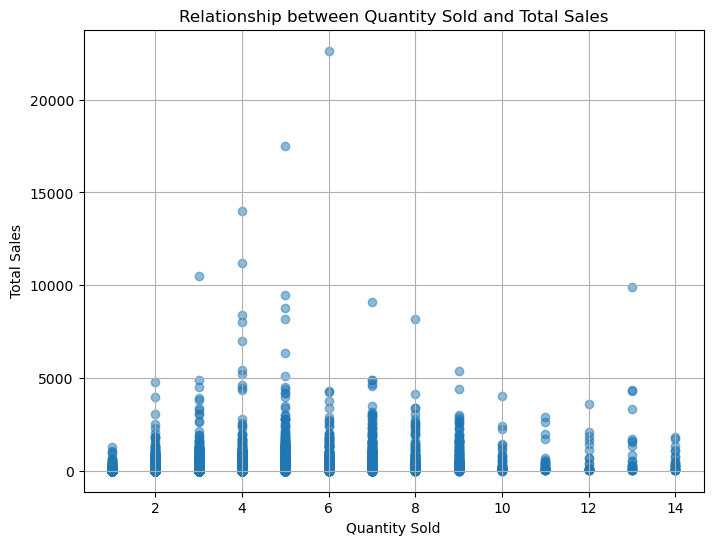

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5)
plt.title('Relationship between Quantity Sold and Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### 9. Sales Trends by Postal Code:

### This shows the specific postal codes that contributes to the total sales and profits.

#### Are there specific postal codes that contribute significantly to total sales and profits?

In [18]:
sales_profits_by_postal_code = df.groupby('Postal Code')[['Sales', 'Profit']].sum().reset_index()
sales_profits_by_postal_code = sales_profits_by_postal_code.sort_values(by=['Sales', 'Profit'], ascending=False)
print("Postal Codes with the Highest Total Sales and Total Profits:")
print(sales_profits_by_postal_code)

Postal Codes with the Highest Total Sales and Total Profits:
     Postal Code      Sales      Profit
54         10024  78697.182  21653.7248
55         10035  77357.885  16533.8669
52         10009  54761.496  13697.0019
578        94122  52667.467   7712.5958
53         10011  45551.598  10152.3901
..           ...        ...         ...
148        32174      2.808     -1.9656
151        32503      2.214     -1.4760
177        33458      2.064      0.1548
226        44035      1.824     -1.3984
453        79605      1.392     -3.7584

[631 rows x 3 columns]


### 10. Regional Discounts:

### This shows regions where higher discounts are offered frequently.

#### Are there regions where higher discounts are offered more frequently?

In [19]:
average_discount_by_region = df.groupby('Region')['Discount'].mean().reset_index()
average_discount_by_region = average_discount_by_region.sort_values(by='Discount', ascending=False)
print("Regions with the Highest Average Discounts:")
print(average_discount_by_region)

Regions with the Highest Average Discounts:
    Region  Discount
0  Central  0.240353
2    South  0.147253
1     East  0.145365
3     West  0.109335


### This shows how discounts affects sales and profits in different regions.

#### How do these discounts affect sales and profit in those regions?

In [20]:
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()
region_summary.columns = ['Region', 'Total Sales', 'Total Profit', 'Average Discount']
region_summary = region_summary.sort_values(by='Average Discount', ascending=False)
print("Summary of Sales, Profit, and Average Discount by Region:")
print(region_summary)

Summary of Sales, Profit, and Average Discount by Region:
    Region  Total Sales  Total Profit  Average Discount
0  Central  501239.8908    39706.3625          0.240353
2    South  391721.9050    46749.4303          0.147253
1     East  678781.2400    91522.7800          0.145365
3     West  725457.8245   108418.4489          0.109335
